# ***LOAN APPROVAL PREDICTION***

- WRITTEN BY: **ABDUL HADI**
- CONTACT VIA: 117abdulhadi@gmail.com

# **IMPORT DATASET**

In [1]:
import pandas as pd, numpy as np, scipy.stats as stats
import seaborn as sns, matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# load dataset
data = pd.read_csv('loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# **DATA PREPROCESSING**

## **EXPLORE DATASET**

### **GATHER INFORMATION**

In [3]:
# print the first 10 records
print("First 10 Records:")
data.head(10)

First 10 Records:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [4]:
dimensions = data.shape     # returns the shape of the data in (rows,columns) format
print("Total Records (Rows): ", dimensions[0])
print("Total Features (Columns): ", dimensions[1])

Total Records (Rows):  4269
Total Features (Columns):  13


In [5]:
print("Structure of Data: ")
data.info()     # prints the structure of the data

Structure of Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
unique_values = data.nunique()      # returns the number of unique values in each feature
print("Unique Values in Each Feature: ")
for feature,count in unique_values.items():
    print(feature, ":", count)      # prints the unique values in each feature

Unique Values in Each Feature: 
loan_id : 4269
no_of_dependents : 6
education : 2
self_employed : 2
income_annum : 98
loan_amount : 378
loan_term : 10
cibil_score : 601
residential_assets_value : 278
commercial_assets_value : 188
luxury_assets_value : 379
bank_asset_value : 146
loan_status : 2


In [7]:
null_values = data.isnull().sum()   # returns the number of null values in each feature
print("Null Values in Each Feature: ")
for feature,count in null_values.items():
    print(feature, ":", count)  # prints the null values in each feature

Null Values in Each Feature: 
loan_id : 0
no_of_dependents : 0
education : 0
self_employed : 0
income_annum : 0
loan_amount : 0
loan_term : 0
cibil_score : 0
residential_assets_value : 0
commercial_assets_value : 0
luxury_assets_value : 0
bank_asset_value : 0
loan_status : 0


In [8]:
freq_table = {column: data[column].value_counts() for column in data.columns}   # Count the frequency of each value in each column
for feature,freq in freq_table.items():
    print(f"{feature}: {freq.to_dict()}\n") # print the frequency of each value in each column

loan_id: {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 13

### **MAKE SENSE OF DATA**

* The dataset is about the **factors affecting loan approval** such as income, dependents, credit score, and assets.
* It has dimensions of **4269 records** and a total of **13 features**.
* The description of each of the features is as follows:

**LOAN APPLICANT PROFILE**
1. **Loan ID**
   * Unique identifier for each loan application.
   * Has a numerical datatype (integer).
   * Contains **4269 unique values**.
2. **Number of Dependents**
   * Number of dependents relying on the applicant.
   * Has a numerical datatype (integer).
   * Contains **6 unique values**.
   * It can be considered as a categorical value.
3. **Education**
   * Applicant’s education level.
   * Has a categorical datatype (character).
   * Has **2 categories**.
4. **Self-Employed**
   * Indicates whether the applicant is self-employed.
   * Has a categorical datatype (character).
   * Has **2 categories**.

**FINANCIAL INFORMATION**
1. **Annual Income**
   * Applicant’s total yearly income.
   * Has a numerical datatype (integer).
   * Contains **98 unique values**.
2. **Loan Amount**
   * Amount of loan requested.
   * Has a numerical datatype (integer).
   * Contains **378 unique values**.
3. **Loan Term**
   * Duration of loan repayment (in months).
   * Has a numerical datatype (integer).
   * Contains **10 unique values**.
4. **CIBIL Score**
   * Credit score of the applicant.
   * Has a numerical datatype (integer).
   * Contains **601 unique values**.

**ASSETS INFORMATION**

9. **Residential Assets Value**
   * Value of applicant’s residential property.
   * Has a numerical datatype (integer).
   * Contains **278 unique values**.
10. **Commercial Assets Value**
    * Value of applicant’s commercial property.
    * Has a numerical datatype (integer).
    * Contains **188 unique values**.
11. **Luxury Assets Value**
    * Value of luxury assets (e.g., cars, jewelry).
    * Has a numerical datatype (integer).
    * Contains **379 unique values**.
12. **Bank Asset Value**
    * Value of applicant’s bank account holdings.
    * Has a numerical datatype (integer).
    * Contains **146 unique values**.

**LOAN OUTCOME**

13. **Loan Status**
    * Final loan application result (target variable).
    * Has a categorical datatype (character).
    * Has **2 categories** (e.g., Approved, Rejected).


## **CLEAN DATASET**

### **HANDLE MISSING/NEGATIVE VALUES**

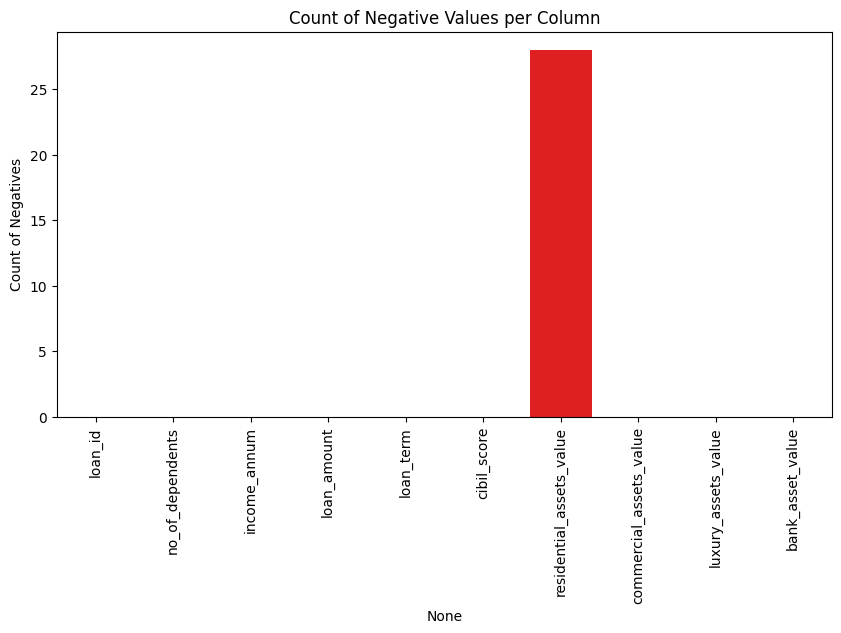

In [9]:
# Numerical Columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a boolean mask of negative values
neg_mask = data[numerical_cols] < 0

# Count negative values per column
neg_counts = neg_mask.sum()

plt.figure(figsize=(10,5))
sns.barplot(x=neg_counts.index, y=neg_counts.values, color="red")
plt.xticks(rotation=90)
plt.title("Count of Negative Values per Column")
plt.ylabel("Count of Negatives")
plt.show()

In [10]:
for col in numerical_cols:
    data[col] = data[col].replace(-100000, np.nan)

data[numerical_cols] = data[numerical_cols].fillna(0)

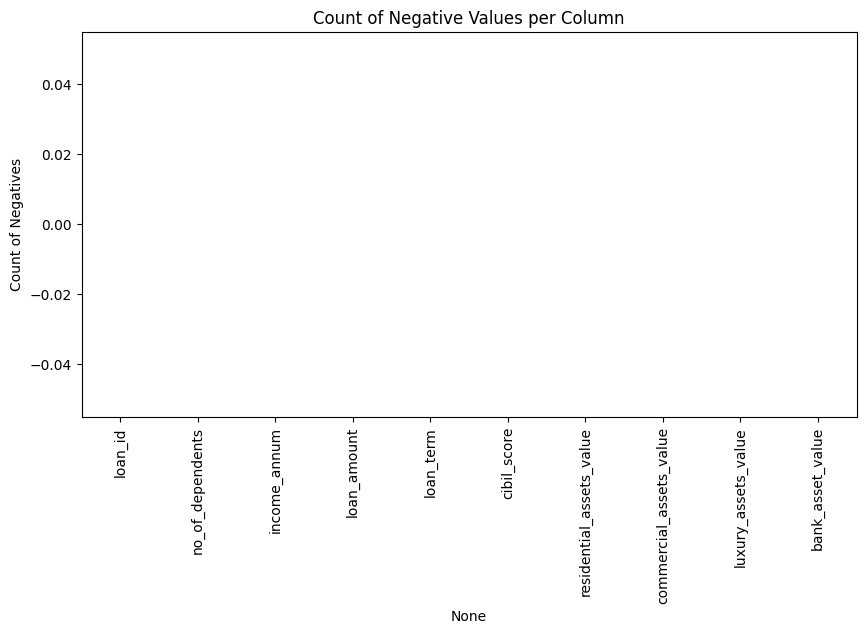

In [11]:
# Create a boolean mask of negative values
neg_mask = data[numerical_cols] < 0

# Count negative values per column
neg_counts = neg_mask.sum()

plt.figure(figsize=(10,5))
sns.barplot(x=neg_counts.index, y=neg_counts.values, color="red")
plt.xticks(rotation=90)
plt.title("Count of Negative Values per Column")
plt.ylabel("Count of Negatives")
plt.show()

### **OUTLIER DETECTION**

In [12]:
# Numerical Columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols:
    Q1 = data[col].quantile(0.25) # calculate 25th percentile
    Q3 = data[col].quantile(0.75) # calculate 75th percentile
    IQR = Q3 - Q1 # calculate interquartile range
    lower_bound = Q1 - 1.5 * IQR # calculate lower bound
    upper_bound = Q3 + 1.5 * IQR # calculate upper bound

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"   Outliers detected: {outliers.shape[0]}")

Column: loan_id
   Outliers detected: 0
Column: no_of_dependents
   Outliers detected: 0
Column: income_annum
   Outliers detected: 0
Column: loan_amount
   Outliers detected: 0
Column: loan_term
   Outliers detected: 0
Column: cibil_score
   Outliers detected: 0
Column: residential_assets_value
   Outliers detected: 52
Column: commercial_assets_value
   Outliers detected: 37
Column: luxury_assets_value
   Outliers detected: 0
Column: bank_asset_value
   Outliers detected: 5


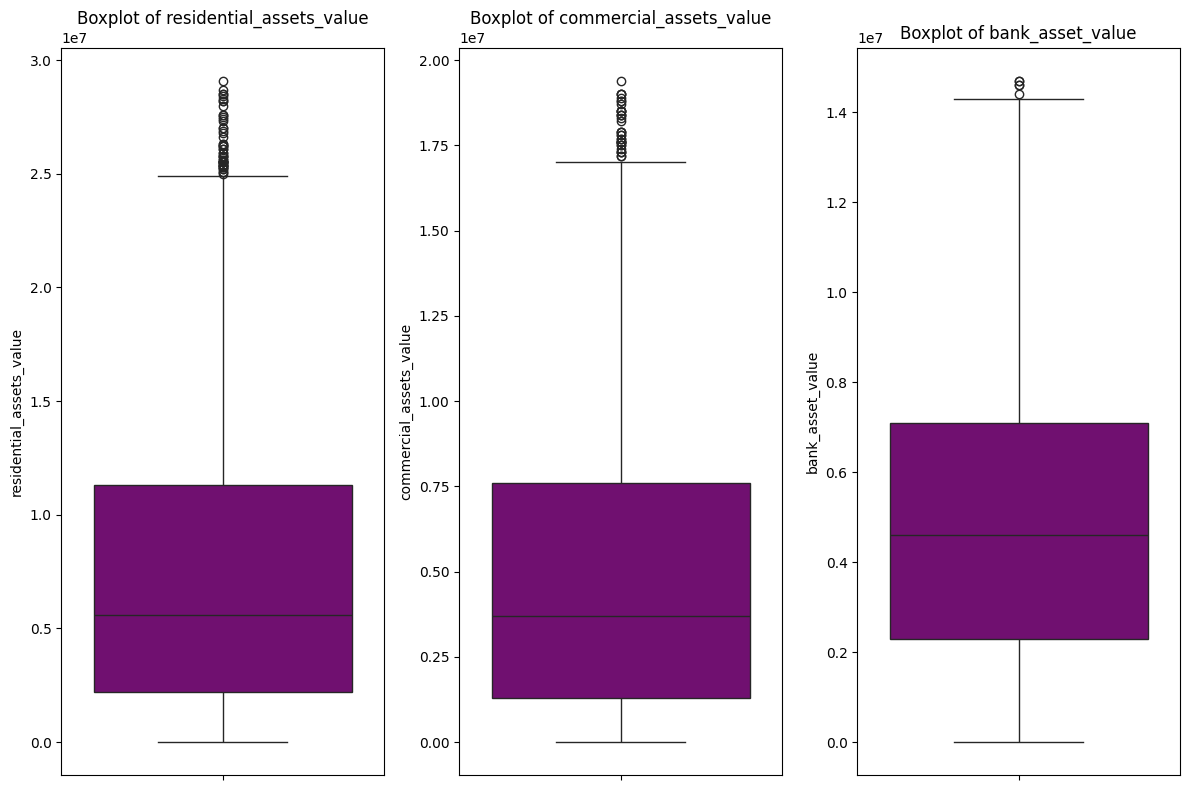

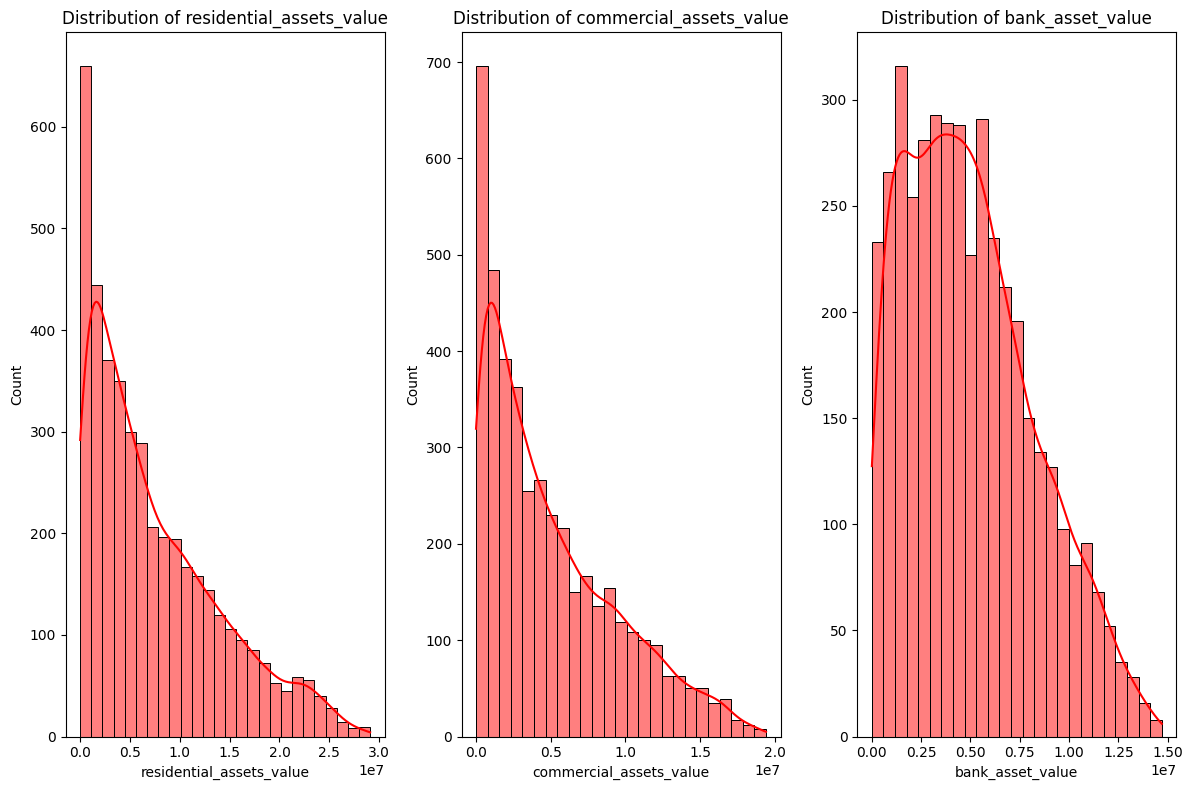

In [13]:
outliers = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']

plt.figure(figsize=(12, 8))
for i, col in enumerate(outliers, 1):
    plt.subplot(1, len(outliers), i)
    sns.boxplot(y=data[col], color = 'purple')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(outliers, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True, color="red")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Domain understanding suggests these observations represent genuinely high-wealth applicants, not data errors. Their magnitudes are realistic and attainable, though they skew the raw distributions.
- Removing valid extremes would
  - bias the sample by under-representing high-net-worth applicants
  - risk discarding predictive signal that can materially influence loan approval outcomes.
- Strategy of Model
  - Tree Models are naturally robust to skewness and extremes.
  - Logistic regression can be stabalized by transformation.
  - The original features are kept alongside the transfomed versions to enable model-specific pipelines and A/B comparisons.
- Box-Cox Transformation
  - Stabilizes variance by Handling strong skewness
  - Retains information as No truncation or arbitrary capping of large values is done.
  - Beneficial for linear models, as it reduces the impact of extreme values and improves coefficient stability.

### **DATA TRANSFORMATION**

In [14]:
# List of columns to transform
outliers = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']

for col in outliers:
    data[f"{col}_boxcox"], _ = stats.boxcox(data[col] + 1)

In [15]:
for col in outliers:
    Q1 = data[f"{col}_boxcox"].quantile(0.25) # calculate 25th percentile
    Q3 = data[f"{col}_boxcox"].quantile(0.75) # calculate 75th percentile
    IQR = Q3 - Q1 # calculate interquartile range
    lower_bound = Q1 - 1.5 * IQR # calculate lower bound
    upper_bound = Q3 + 1.5 * IQR # calculate upper bound

    # Identify outliers
    outliers = data[(data[f"{col}_boxcox"] < lower_bound) | (data[f"{col}_boxcox"] > upper_bound)]
    print(f"Column: {col}")
    print(f"   Outliers detected: {outliers.shape[0]}")

Column: residential_assets_value
   Outliers detected: 0
Column: commercial_assets_value
   Outliers detected: 0
Column: bank_asset_value
   Outliers detected: 0


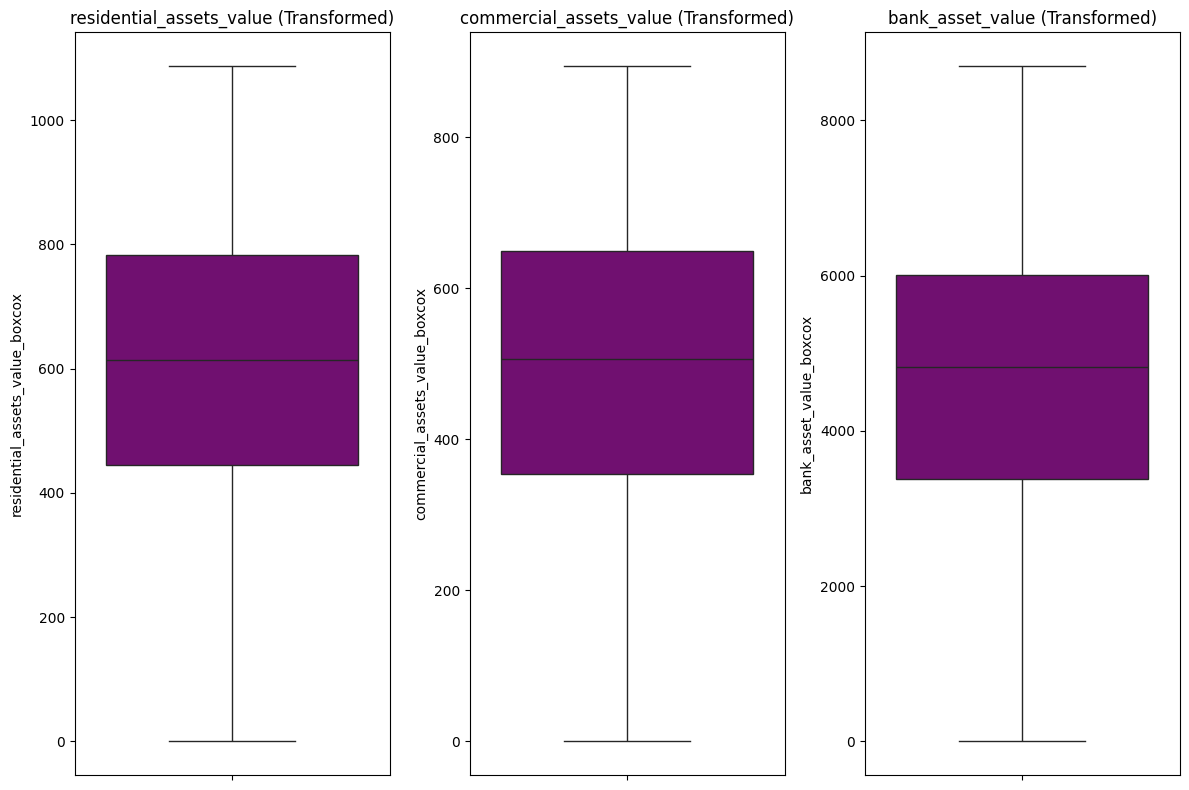

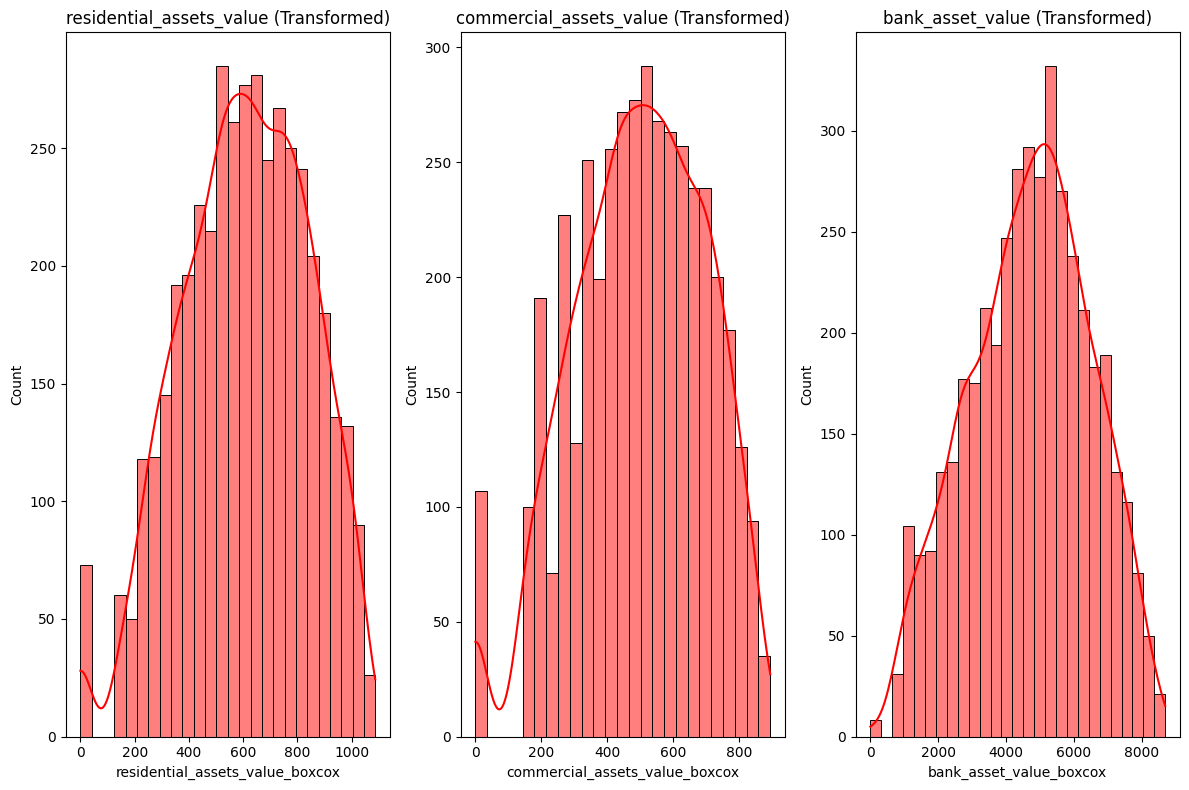

In [16]:
outliers = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']
# Check the effect
plt.figure(figsize=(12, 8))
for i, col in enumerate(outliers, 1):
    plt.subplot(1, len(outliers), i)
    sns.boxplot(y=data[f"{col}_boxcox"], color = 'purple')
    plt.title(f'{col} (Transformed)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(outliers, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[f"{col}_boxcox"], kde=True, color="red")
    plt.title(f"{col} (Transformed)")
plt.tight_layout()
plt.show()

# **FEATURE DISTRIBUTION**

### **NUMERICAL FEATURES**

In [17]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)

['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'residential_assets_value_boxcox', 'commercial_assets_value_boxcox', 'bank_asset_value_boxcox']


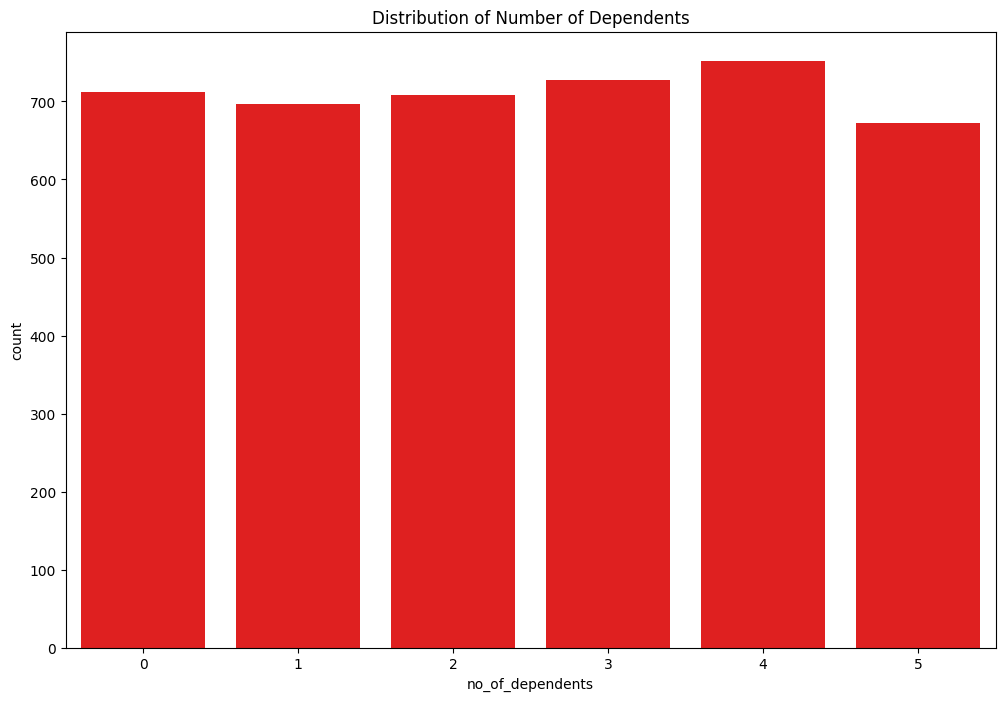

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(x='no_of_dependents', data=data, color='red')
plt.title('Distribution of Number of Dependents')
plt.show()

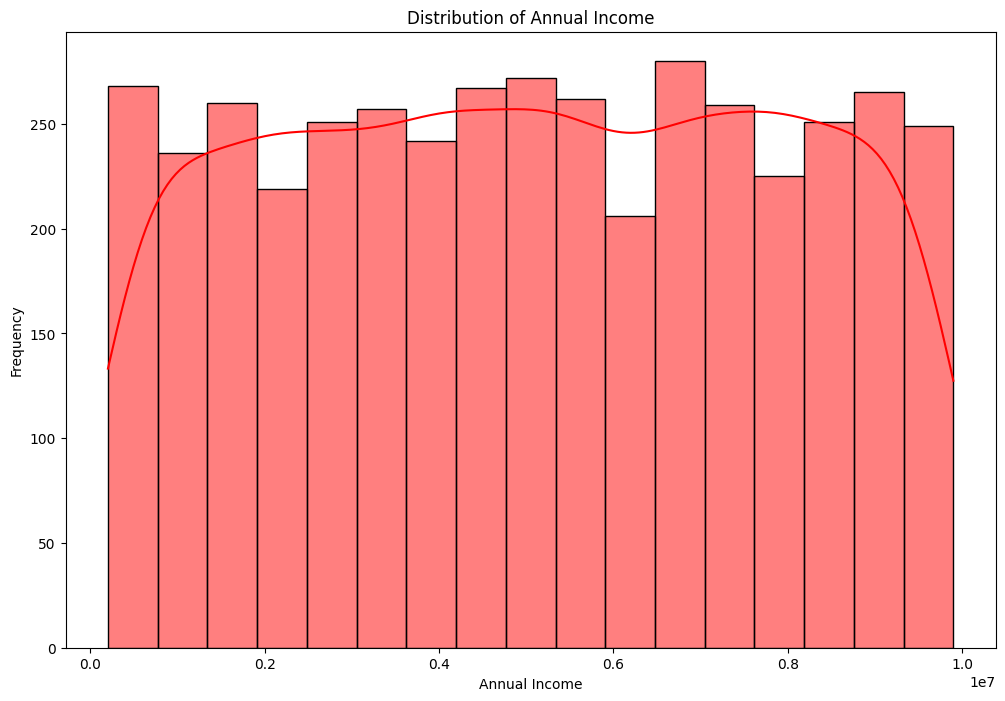

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(x = "income_annum", data=data, kde=True, color="red")
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

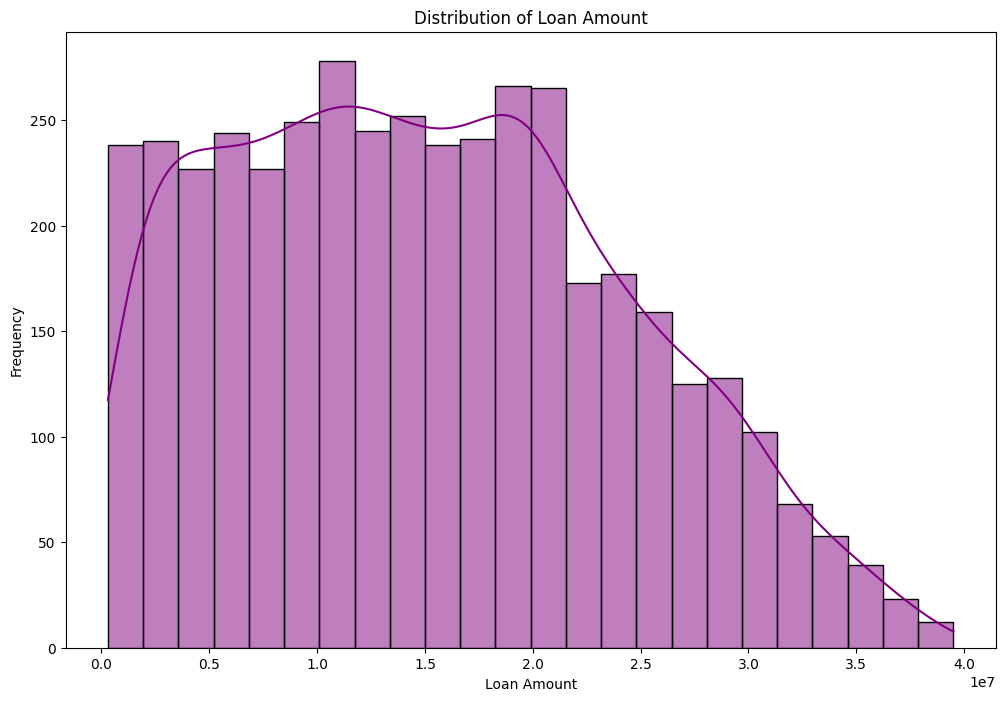

In [20]:
plt.figure(figsize=(12, 8))
sns.histplot(x = "loan_amount", data=data, kde=True, color="purple")
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

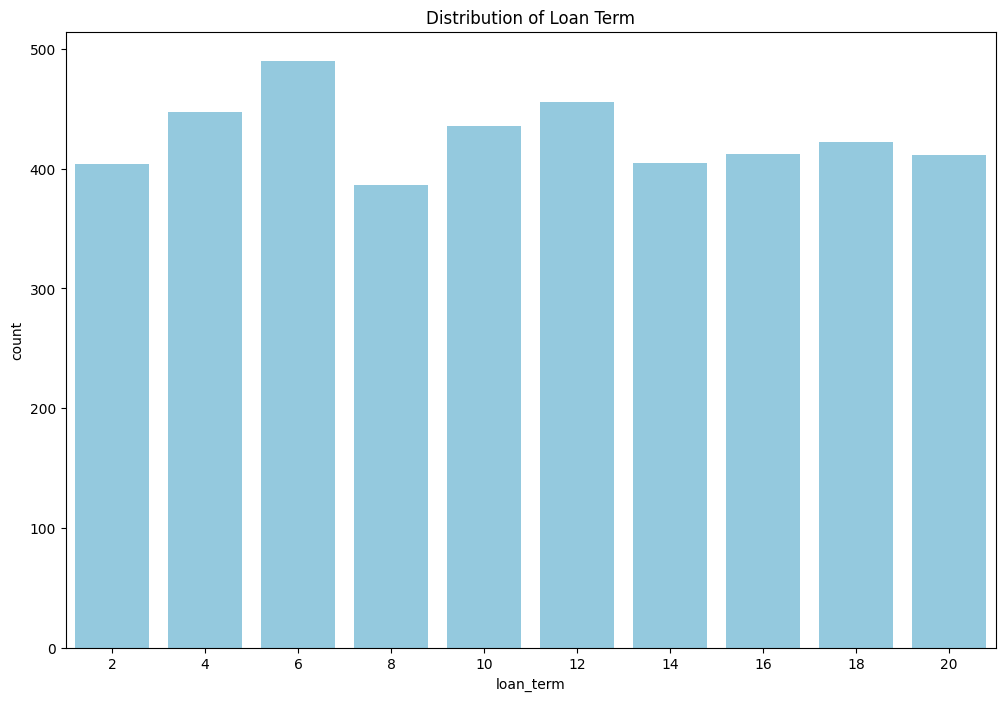

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x='loan_term', data=data, color='skyblue')
plt.title('Distribution of Loan Term')
plt.show()

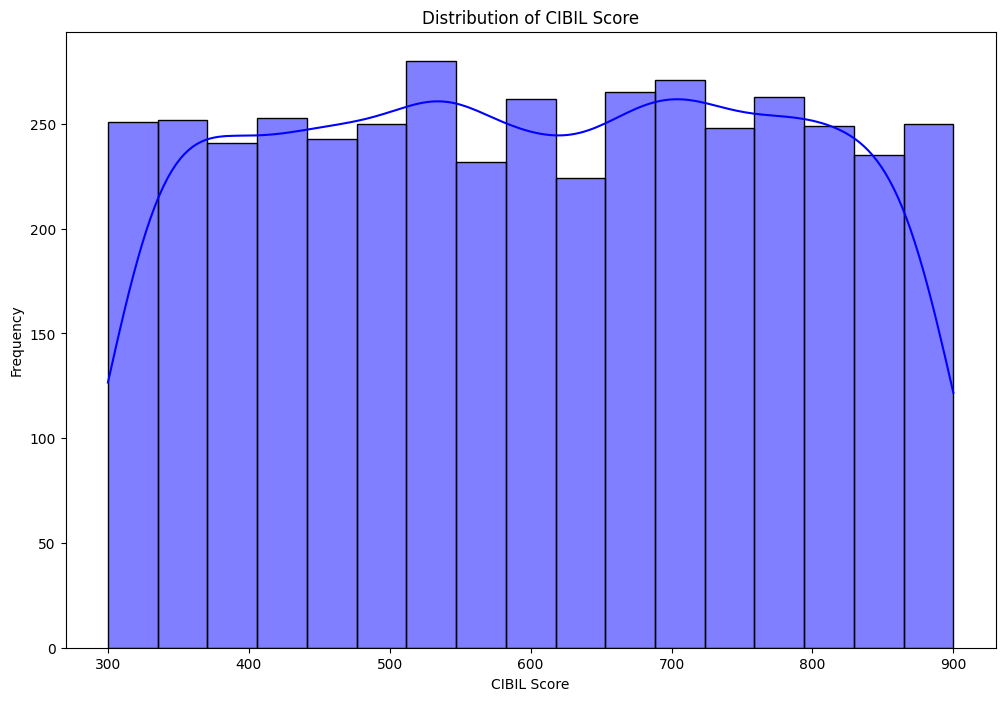

In [22]:
plt.figure(figsize=(12, 8))
sns.histplot(x = "cibil_score", data=data, kde=True, color="blue")
plt.title("Distribution of CIBIL Score")
plt.xlabel("CIBIL Score")
plt.ylabel("Frequency")
plt.show()

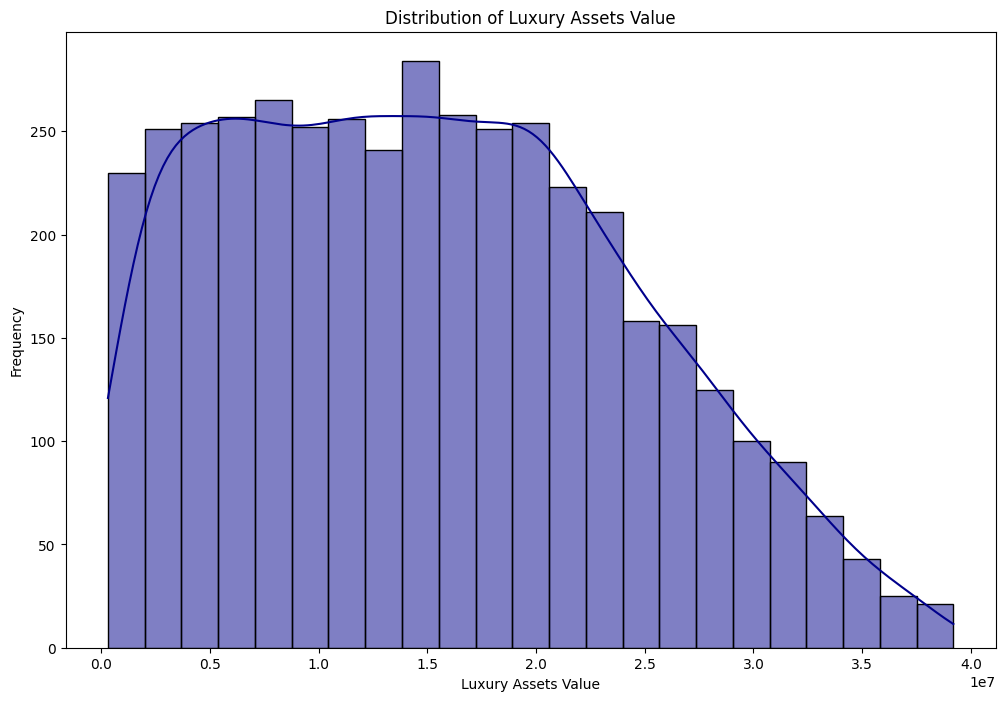

In [23]:
plt.figure(figsize=(12, 8))
sns.histplot(x = "luxury_assets_value", data=data, kde=True, color="darkblue")
plt.title("Distribution of Luxury Assets Value")
plt.xlabel("Luxury Assets Value")
plt.ylabel("Frequency")
plt.show()

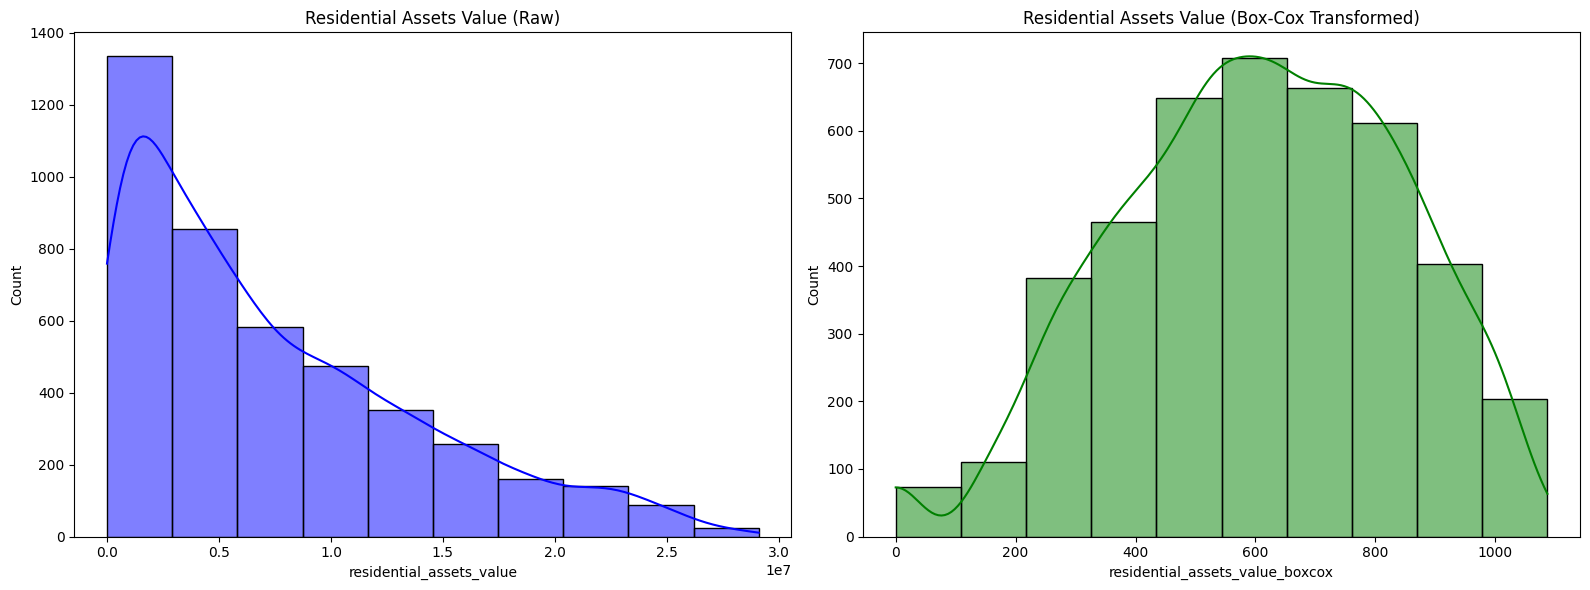

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=data, x='residential_assets_value', bins=10, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Residential Assets Value (Raw)')
sns.histplot(data=data, x='residential_assets_value_boxcox', bins=10, ax=axes[1], kde=True, color='green')
axes[1].set_title('Residential Assets Value (Box-Cox Transformed)')
plt.tight_layout()
plt.show()

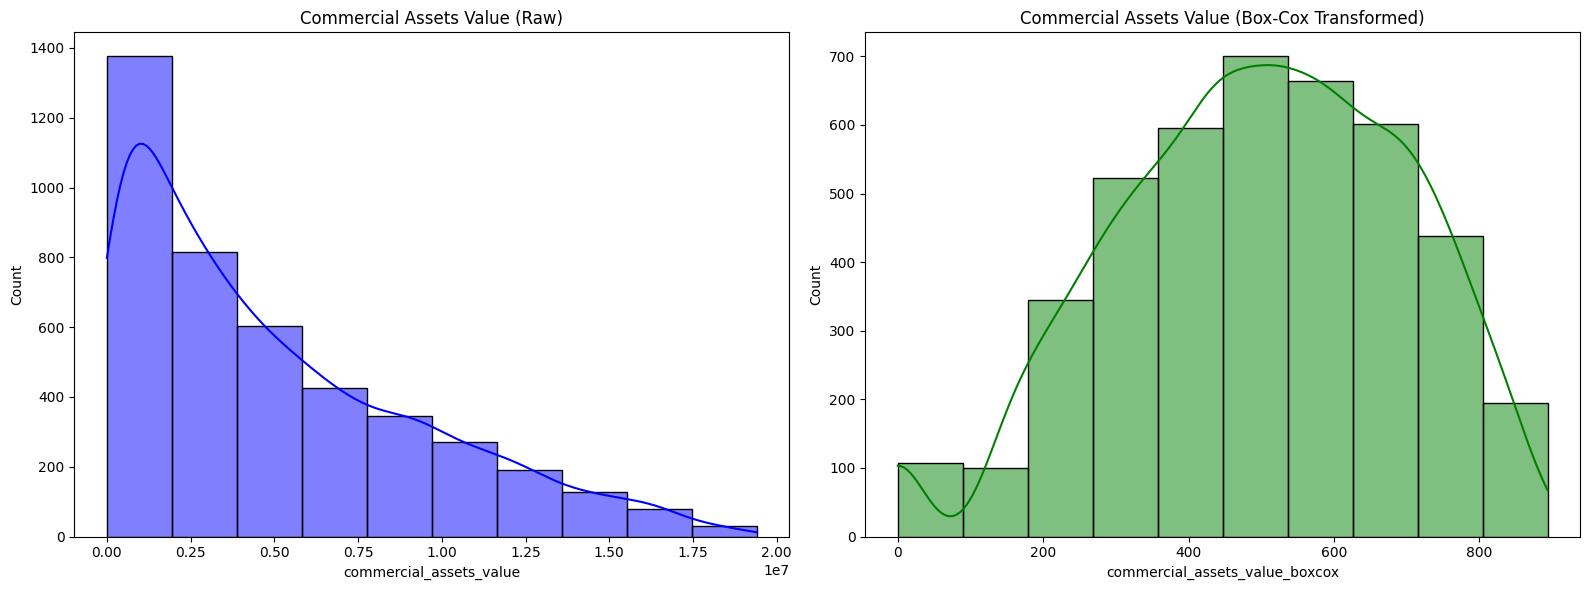

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=data, x='commercial_assets_value', bins=10, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Commercial Assets Value (Raw)')
sns.histplot(data=data, x='commercial_assets_value_boxcox', bins=10, ax=axes[1], kde=True, color='green')
axes[1].set_title('Commercial Assets Value (Box-Cox Transformed)')
plt.tight_layout()
plt.show()

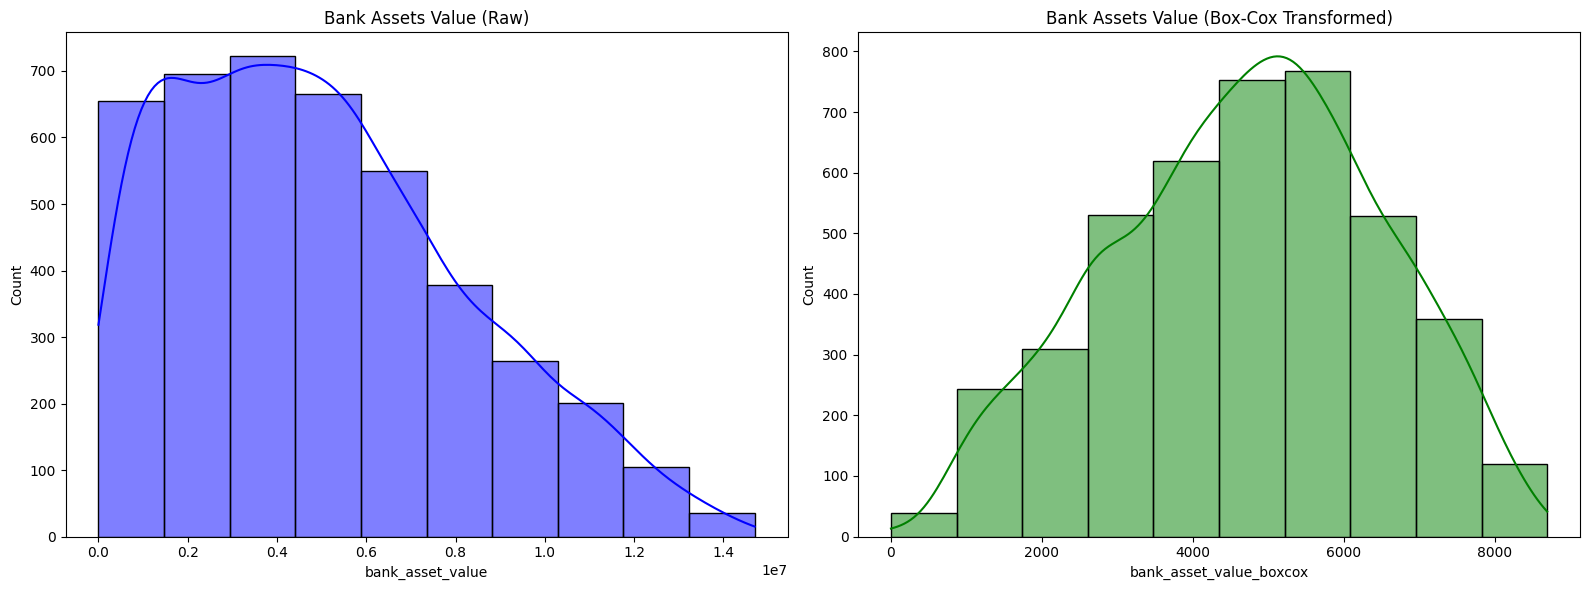

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=data, x='bank_asset_value', bins=10, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Bank Assets Value (Raw)')
sns.histplot(data=data, x='bank_asset_value_boxcox', bins=10, ax=axes[1], kde=True, color='green')
axes[1].set_title('Bank Assets Value (Box-Cox Transformed)')
plt.tight_layout()
plt.show()

### **CATEGORICAL FEATURES**

In [27]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('loan_status')
print(categorical_cols)

['education', 'self_employed']


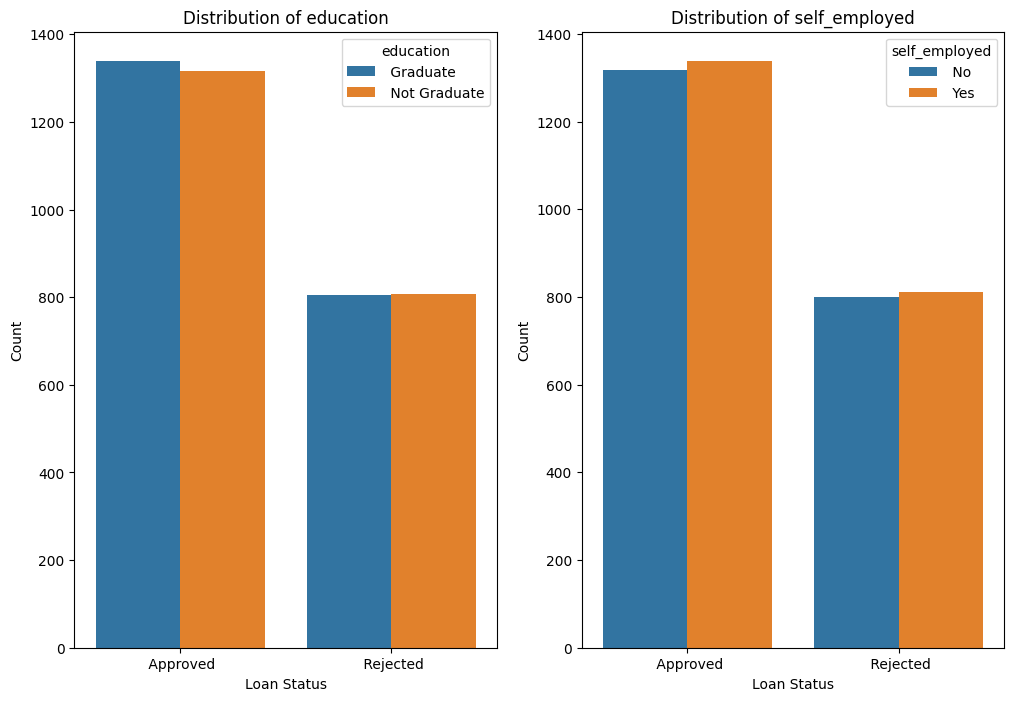

In [28]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    sns.countplot(x = 'loan_status', hue = col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel("Loan Status")
    plt.ylabel("Count")

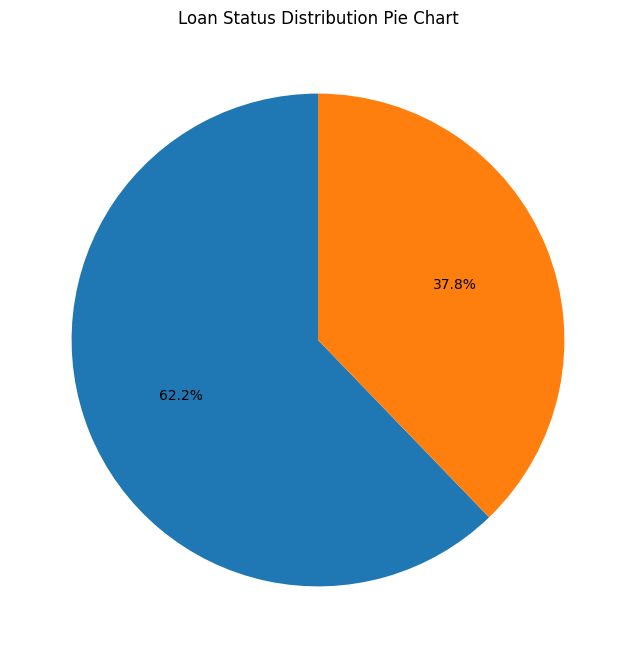

In [29]:
target_col = 'loan_status'
plt.figure(figsize=(12, 8))
plt.pie(data[target_col].value_counts(), autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution Pie Chart')
plt.show()

- The target variable “Loan Status” 
  - is distributed as 62.2% Approved and 37.8% Rejected. 
  - This distribution is not perfectly balanced but not severely imbalanced either.
  - Models are unlikely to be heavily biased towards the majority class.
  - Therefore, oversampling techniques such as SMOTE are not necessary.

# **MACHINE LEARNING PHASE**

## **FEATURE ENGINEERING**

### **FEATURE ENCODING**

In [30]:
ml_data = data.copy()

In [31]:
def label_encoding(data, column):
    encoder = LabelEncoder()
    data[column + '_encoded'] = encoder.fit_transform(data[column])
    return data

ml_data = label_encoding(ml_data, 'education')
ml_data = label_encoding(ml_data, 'self_employed')
ml_data = label_encoding(ml_data, 'loan_status')

### **FEATURE SELECTION**

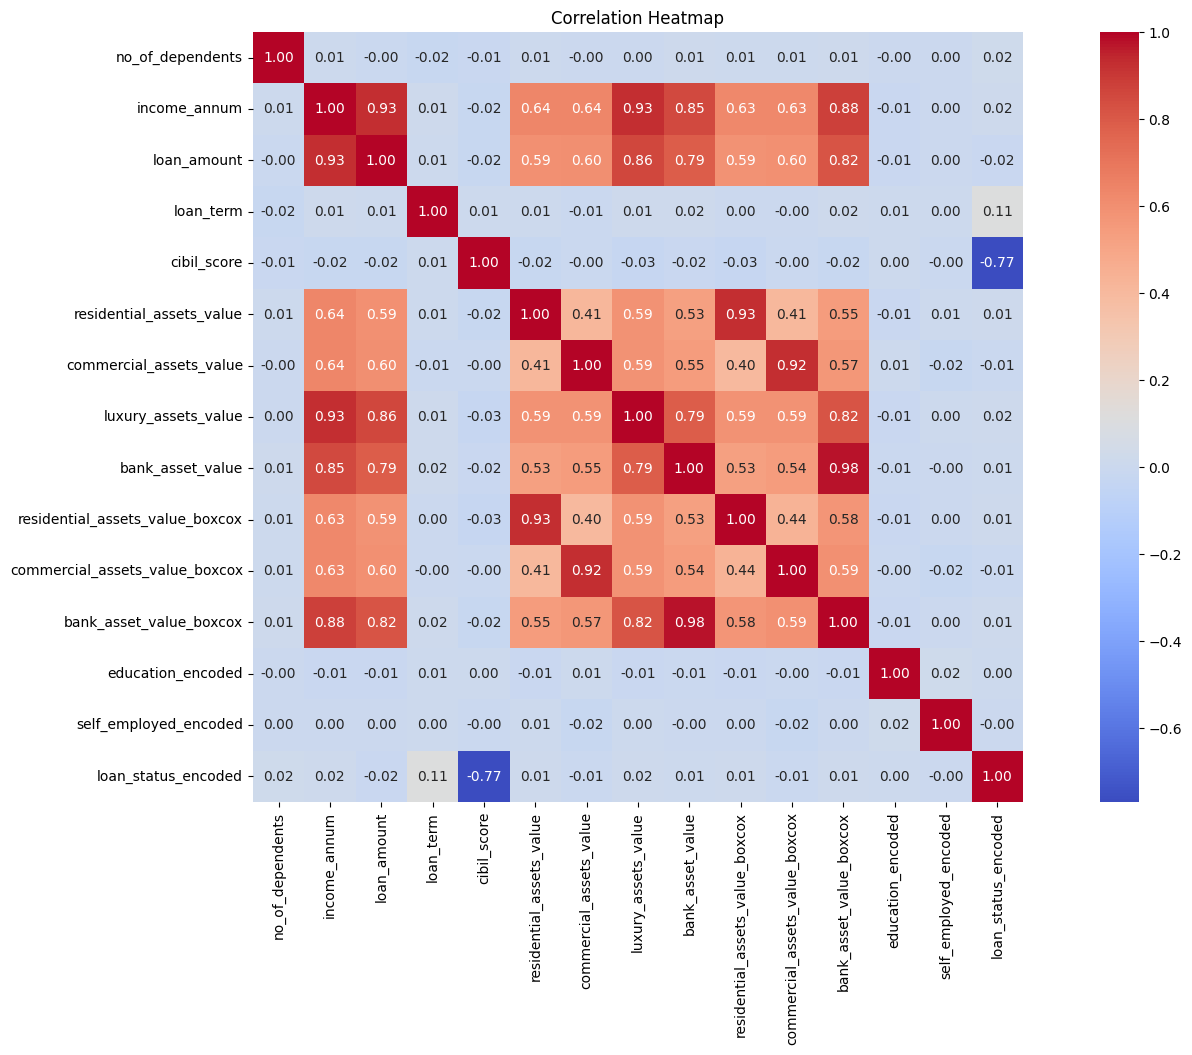

Correlation with Target Variable:
loan_status_encoded                1.000000
loan_term                          0.113036
no_of_dependents                   0.018114
luxury_assets_value                0.015465
income_annum                       0.015189
residential_assets_value           0.014379
residential_assets_value_boxcox    0.013591
bank_asset_value_boxcox            0.011494
bank_asset_value                   0.006778
education_encoded                  0.004918
self_employed_encoded             -0.000345
commercial_assets_value           -0.008246
commercial_assets_value_boxcox    -0.009110
loan_amount                       -0.016150
cibil_score                       -0.770518
Name: loan_status_encoded, dtype: float64


In [32]:
numerical_cols = ml_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('loan_id')
    
corr = ml_data[numerical_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

print("Correlation with Target Variable:")
print(corr['loan_status_encoded'].sort_values(ascending=False))

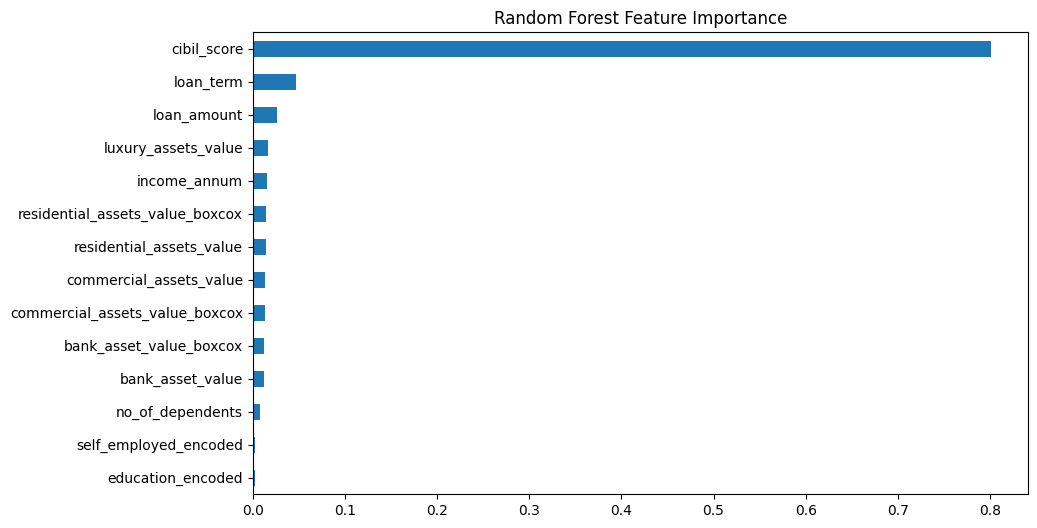

Feature Importance:
cibil_score                        0.801111
loan_term                          0.046703
loan_amount                        0.026506
luxury_assets_value                0.016816
income_annum                       0.015891
residential_assets_value_boxcox    0.014012
residential_assets_value           0.014000
commercial_assets_value            0.013692
commercial_assets_value_boxcox     0.013510
bank_asset_value_boxcox            0.012520
bank_asset_value                   0.012380
dtype: float64


In [33]:
categorical_cols = ml_data.select_dtypes(include=['object']).columns.tolist()

X = ml_data.drop(columns=['loan_status_encoded', 'loan_id'] + categorical_cols)
y = ml_data['loan_status_encoded']

rf = RandomForestClassifier(
    n_estimators=1000,
    random_state=42,
    class_weight= 'balanced'
)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort by importance
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()
print("Feature Importance:")
print(importances[importances > 0.01])

In [34]:
selected_features = [
    'cibil_score', 'loan_term', 'loan_amount',
    'income_annum', 'luxury_assets_value', 'residential_assets_value_boxcox',
    'bank_asset_value_boxcox', 'commercial_assets_value_boxcox', 'no_of_dependents',
]

To identify influential predictors, two selection methods were applied.
  - **Correlation Analysis**
    - **Strongest predictors of loan approval status:**
      * **CIBIL Score** (r = –0.77, strong inverse relationship with rejection)
      * **Loan Term** (r = 0.11, weak but relatively strongest positive correlation)
    * **Other features** showed very weak or negligible linear associations with loan approval.
  - **Random Forest Feature Importance**
    * **Top predictors:**
      * **CIBIL Score** (most important feature)
      * **Loan Term**
      * **Loan Amount**
    * **Moderately important features:**
      * **Income**
      * **Luxury Assets Value**
      * **Residential Assets Value (Box-Cox transformed)**
    * **Low contribution features:**
      * Bank Assets, Commercial Assets
      * Number of Dependents, Education, Self-Employed
  - **Overall Insight**
    * **Core Predictors (strongest evidence across both methods):**
      * **CIBIL Score**
      * **Loan Term**
    * **Supportive Predictors (important in Random Forest but weak linear correlation):**
      * Loan Amount
      * Annual Income
      * Luxury Assets Value
      * Residential Assets Value (Box-Cox)
    * **Contextual / Weak Predictors:**
      * Bank Assets (Box-Cox), Commercial Assets (Box-Cox)
      * Number of Dependents, Education, Self-Employed



## **MODEL IMPLEMENTATION**

In [35]:
selected_features = [
    'cibil_score', 'loan_term', 'loan_amount',
    'income_annum', 'luxury_assets_value', 'residential_assets_value_boxcox',
    'bank_asset_value_boxcox', 'commercial_assets_value_boxcox', 'no_of_dependents',
]

Target = 'loan_status_encoded'
features = selected_features

X = ml_data[features]
y = ml_data[Target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### **TREE MODEL** 

In [36]:

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)

random_forest = RandomForestClassifier(n_estimators=400, random_state=42)
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)

In [37]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_predictions))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       797
           1       0.97      0.97      0.97       484

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [38]:
print("Random Forest Classification Report:")
print(classification_report(y_test, random_forest_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       797
           1       0.99      0.97      0.98       484

    accuracy                           0.98      1281
   macro avg       0.99      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



### **LOGICSTIC REGRESSION**

In [39]:

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)

In [40]:
print("Logistic Regression Classification Report: ")
print(classification_report(y_test, logistic_regression_predictions))

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       797
           1       0.82      0.69      0.75       484

    accuracy                           0.83      1281
   macro avg       0.82      0.80      0.81      1281
weighted avg       0.82      0.83      0.82      1281



## **MODEL EVALUATION**

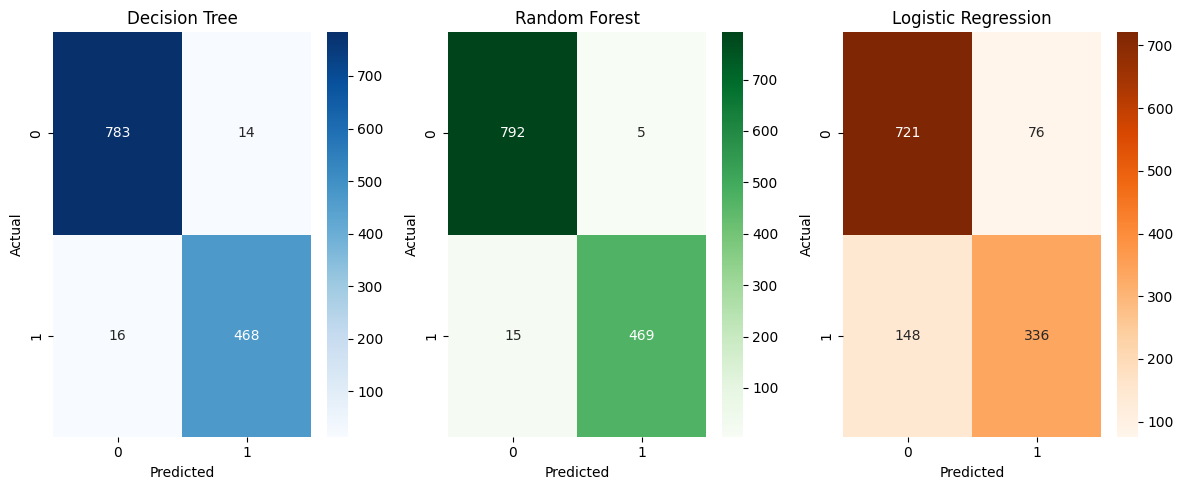

In [41]:
cm_dt = confusion_matrix(y_test, decision_tree_predictions)
cm_rf = confusion_matrix(y_test, random_forest_predictions)
cm_lr = confusion_matrix(y_test, logistic_regression_predictions)

fig, axes = plt.subplots(1, 3, figsize=(12,5))

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("Logistic Regression")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()



--- Classification Reports (all metrics) ---

                        Decision Tree  Random Forest  Logistic Regression
0 precision                  0.979975       0.981413             0.829689
0 recall                     0.982434       0.993726             0.904642
0 f1-score                   0.981203       0.987531             0.865546
1 precision                  0.970954       0.989451             0.815534
1 recall                     0.966942       0.969008             0.694215
1 f1-score                   0.968944       0.979123             0.750000
accuracy                     0.976581       0.984387             0.825137
macro avg precision          0.975465       0.985432             0.822612
macro avg recall             0.974688       0.981367             0.799429
macro avg f1-score           0.975074       0.983327             0.807773
weighted avg precision       0.976567       0.984450             0.824341
weighted avg recall          0.976581       0.984387             

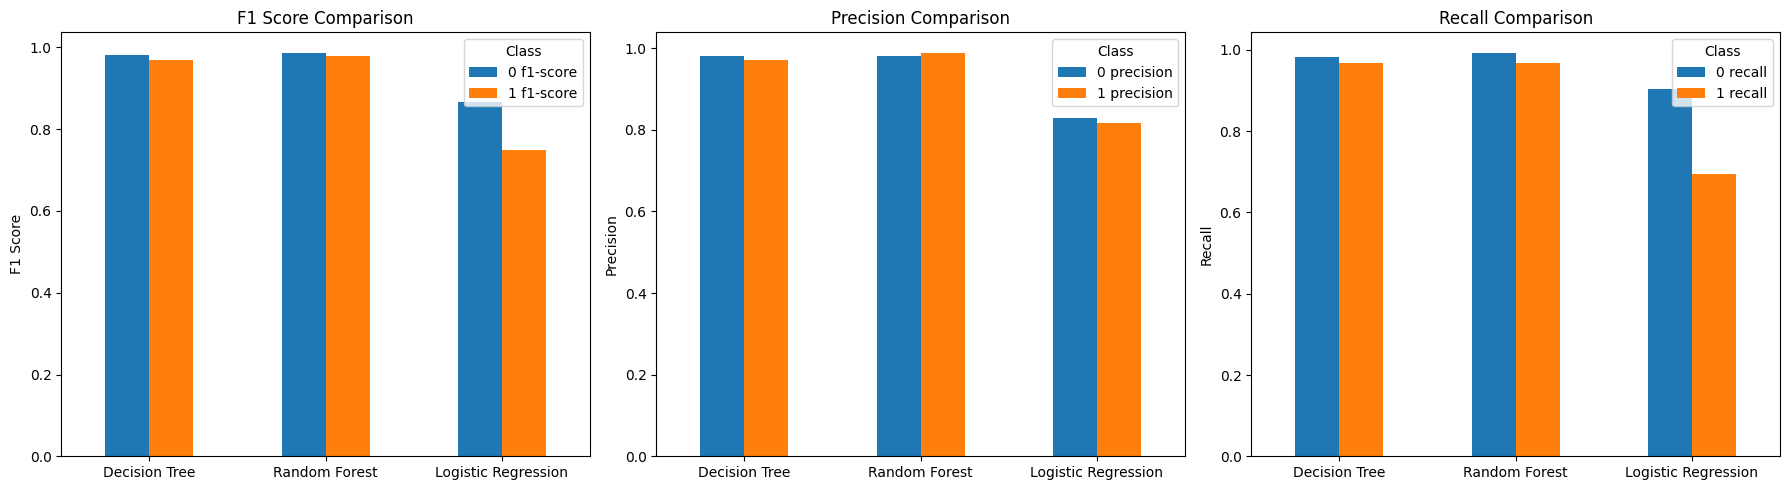

In [42]:
report_dt = classification_report(y_test, decision_tree_predictions, output_dict=True)
report_rf = classification_report(y_test, random_forest_predictions, output_dict=True)
report_lr = classification_report(y_test, logistic_regression_predictions, output_dict=True)

# Convert to DataFrame for comparison (precision, recall, f1 for class 1 and 0 + avg)
metrics = ["precision", "recall", "f1-score"]
classes = ["0", "1", "accuracy", "macro avg", "weighted avg"]

df_reports = pd.DataFrame({
    "Decision Tree": [
        report_dt[c][m] if c != "accuracy" else report_dt["accuracy"]
        for c in classes for m in (metrics if c != "accuracy" else ["accuracy"])
    ],
    "Random Forest": [
        report_rf[c][m] if c != "accuracy" else report_rf["accuracy"]
        for c in classes for m in (metrics if c != "accuracy" else ["accuracy"])
    ],
    "Logistic Regression": [
        report_lr[c][m] if c != "accuracy" else report_lr["accuracy"]
        for c in classes for m in (metrics if c != "accuracy" else ["accuracy"])
    ]
},
index=[f"{c} {m}" if c != "accuracy" else "accuracy" for c in classes for m in (metrics if c != "accuracy" else ["accuracy"])]
)

print("\n--- Classification Reports (all metrics) ---\n")
print(df_reports)

# --- Visualization of Precision, Recall, F1 ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# F1-score subplot
df_plot_f1 = df_reports.loc[["0 f1-score", "1 f1-score"]].T
df_plot_f1.plot(kind="bar", ax=axes[0])
axes[0].set_title("F1 Score Comparison")
axes[0].set_ylabel("F1 Score")
axes[0].set_xticklabels(df_plot_f1.index, rotation=0)
axes[0].legend(title="Class")

# Precision subplot
df_plot_precision = df_reports.loc[["0 precision", "1 precision"]].T
df_plot_precision.plot(kind="bar", ax=axes[1])
axes[1].set_title("Precision Comparison")
axes[1].set_ylabel("Precision")
axes[1].set_xticklabels(df_plot_precision.index, rotation=0)
axes[1].legend(title="Class")

# Recall subplot
df_plot_recall = df_reports.loc[["0 recall", "1 recall"]].T
df_plot_recall.plot(kind="bar", ax=axes[2])
axes[2].set_title("Recall Comparison")
axes[2].set_ylabel("Recall")
axes[2].set_xticklabels(df_plot_recall.index, rotation=0)
axes[2].legend(title="Class")

plt.tight_layout()
plt.show()